In [ ]:
#Librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes
import matplotlib.pyplot as plt # Creación de gráficos
sns.set(style="whitegrid") #utilidades especificas para visualización
plt.rcParams["figure.figsize"] = (10, 6) #utilidades especificas para visualización


In [ ]:
#Instalación silenciosa del paquete missingno
%%capture
#los signos %% evita que se muestre output
!pip install missingno #el signo ! indica que es un comando


#1. Obtención del dataset y breve vistazo a los datos


In [ ]:
#Procedemos a cargar el dataset y visualizarlo
df_clean=pd.read_csv("cleaned_train.csv")
df_clean_test = pd.read_csv("cleaned_test.csv")

# Obtenemos una lista de las columnas que queremos cambiar su tipo
cat_cols = [
    'brand','fuel_type','transmission_simple',
    'accident','clean_title'
]
# Cambiamos el tipo a category
df_clean[cat_cols] = df_clean[cat_cols].astype('category')
df_clean_test[cat_cols] = df_clean_test[cat_cols].astype('category')

df_clean.info() #ver los datatypes, valores faltantes
df_clean.describe() #stats de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   brand                188533 non-null  category
 1   model_year           188533 non-null  int64   
 2   milage               188533 non-null  int64   
 3   fuel_type            188533 non-null  category
 4   accident             188533 non-null  category
 5   clean_title          188533 non-null  category
 6   price                188533 non-null  int64   
 7   car_age              188533 non-null  int64   
 8   horsepower           188533 non-null  float64 
 9   engine_size_L        188533 non-null  float64 
 10  cylinders            188533 non-null  float64 
 11  transmission_simple  188533 non-null  category
dtypes: category(5), float64(3), int64(4)
memory usage: 11.0 MB


,model_year,milage,price,car_age,horsepower,engine_size_L,cylinders
count,188533.000000,188533.000000,1.885330e+05,188533.000000,188533.000000,188533.000000,188533.000000
mean,2015.829998,65705.295174,4.387802e+04,10.170002,340.747577,3.783555,6.299120
std,5.660967,49798.158076,7.881952e+04,5.660967,104.265258,1.306341,1.397836
min,1974.000000,100.000000,2.000000e+03,2.000000,70.000000,0.650000,3.000000
25%,2013.000000,24115.000000,1.700000e+04,6.000000,280.000000,3.000000,6.000000
50%,2017.000000,57785.000000,3.082500e+04,9.000000,329.000000,3.500000,6.000000
75%,2020.000000,95400.000000,4.990000e+04,13.000000,395.000000,4.600000,8.000000
max,2024.000000,405000.000000,2.954083e+06,52.000000,1020.000000,8.400000,12.000000


In [ ]:
#visualización del dataset
df_clean.head(20) #muestra las primeras filas

,brand,model_year,milage,fuel_type,accident,clean_title,price,car_age,horsepower,engine_size_L,cylinders,transmission_simple
0,MINI,2007,213000,Gasoline,None reported,Yes,4200,19,172.0,1.6,4.0,AT
1,Lincoln,2002,143250,Gasoline,At least 1 accident or damage reported,Yes,4999,24,252.0,3.9,8.0,AT
2,Chevrolet,2002,136731,E85 Flex Fuel,None reported,Yes,13900,24,320.0,5.3,8.0,AT
3,Genesis,2017,19500,Gasoline,None reported,Yes,45000,9,420.0,5.0,8.0,AT
4,Mercedes-Benz,2021,7388,Gasoline,None reported,Yes,97500,5,208.0,2.0,4.0,AT
5,Audi,2018,40950,Gasoline,None reported,Yes,29950,8,252.0,2.0,4.0,AT
6,Audi,2016,62200,Gasoline,None reported,Yes,28500,10,333.0,3.0,6.0,AT
7,Chevrolet,2016,102604,E85 Flex Fuel,None reported,Yes,12500,10,355.0,5.3,8.0,AT
8,Ford,2020,38352,Gasoline,None reported,Yes,62890,6,329.0,2.7,6.0,AT
9,BMW,2015,74850,Gasoline,None reported,Yes,4000,11,425.0,3.0,6.0,AT


#2.Análisis Univariado – Métricas Numéricas

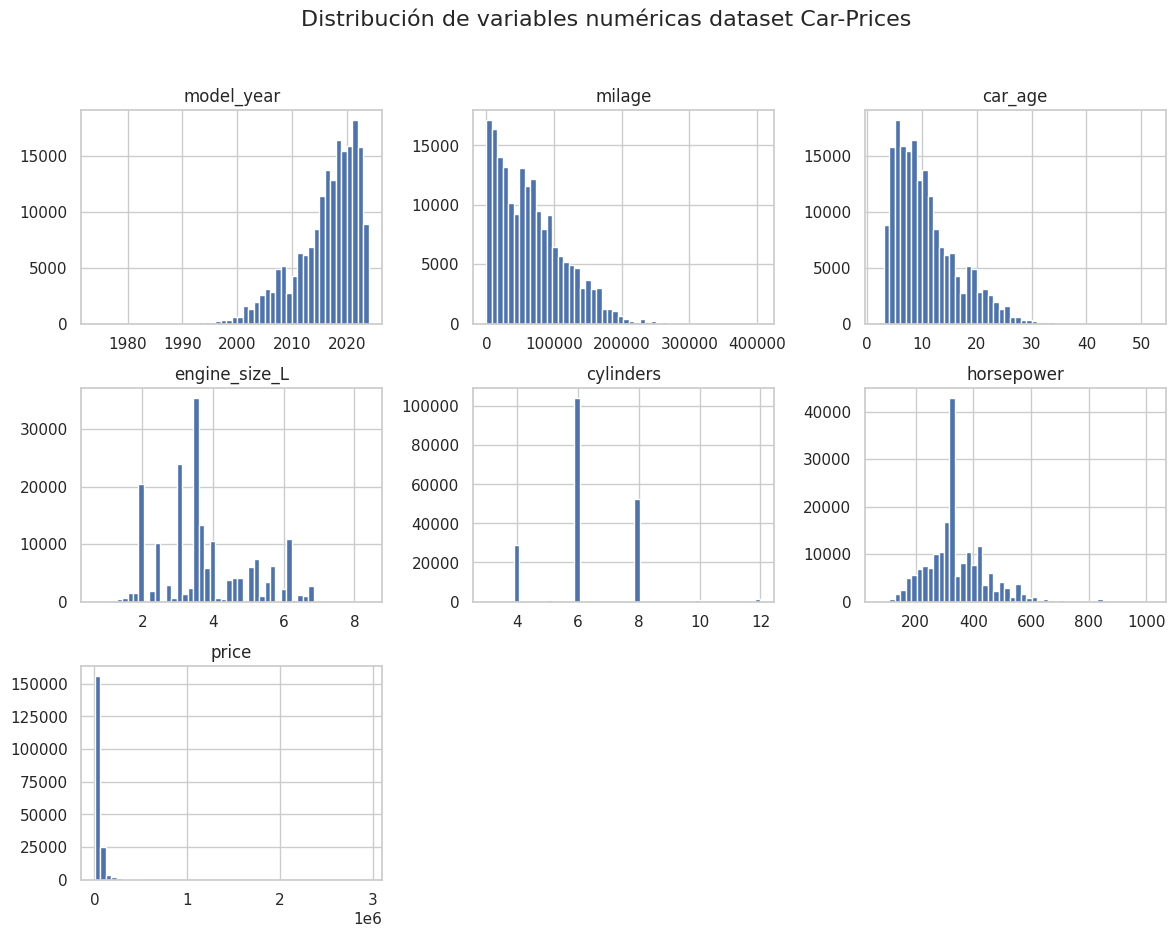

In [ ]:
#Guardamos las variables númericas en una lista
variables_numericas = ['model_year','milage','car_age','engine_size_L','cylinders','horsepower','price']
# Realización de histograma por cada columna dentro del array
df_clean[variables_numericas].hist(
    figsize=(14,10),
    bins=50
)

plt.suptitle("Distribución de variables numéricas dataset Car-Prices", fontsize=16)
plt.show()


# Precio, la variable objetivo

In [ ]:
df_clean['price'].max()

2954083

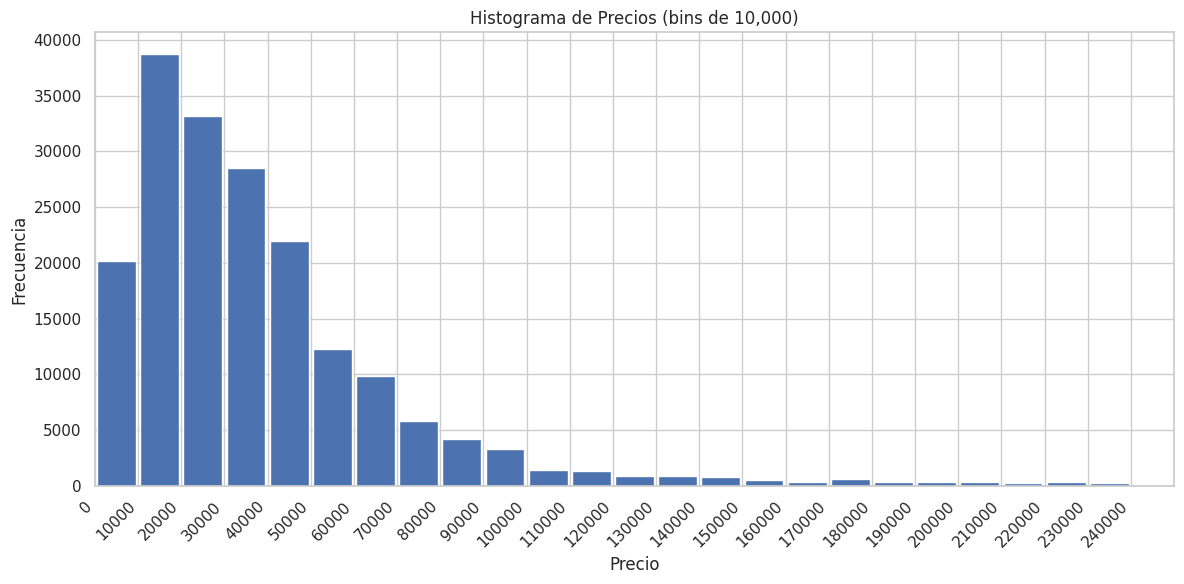

In [ ]:


# bins de 10,000 en 10,000 hasta 150,000
bins = np.arange(0, 250000, 10000)

plt.figure(figsize=(12, 6))

plt.hist(
    df_clean['price'],
    bins=bins,
    rwidth=0.9   # <-- separación entre barras
)

plt.title('Histograma de Precios (bins de 10,000)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.xticks(bins, rotation=45, ha='right')
plt.xlim(0, 250000)

plt.tight_layout()
plt.show()


#3.Detección de outliers (método IQR)

In [ ]:
import pandas as pd

#Visualización de outliers hechos manualmente
outliers_summary = {}

for col in variables_numericas:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outliers_summary[col] = outliers.shape[0]

#Dataframe para visualizar la cantidad de registros que son outliers
outliers_summary


{'model_year': 5132,
 'milage': 1766,
 'car_age': 5132,
 'engine_size_L': 422,
 'cylinders': 1266,
 'horsepower': 5696,
 'price': 10880}

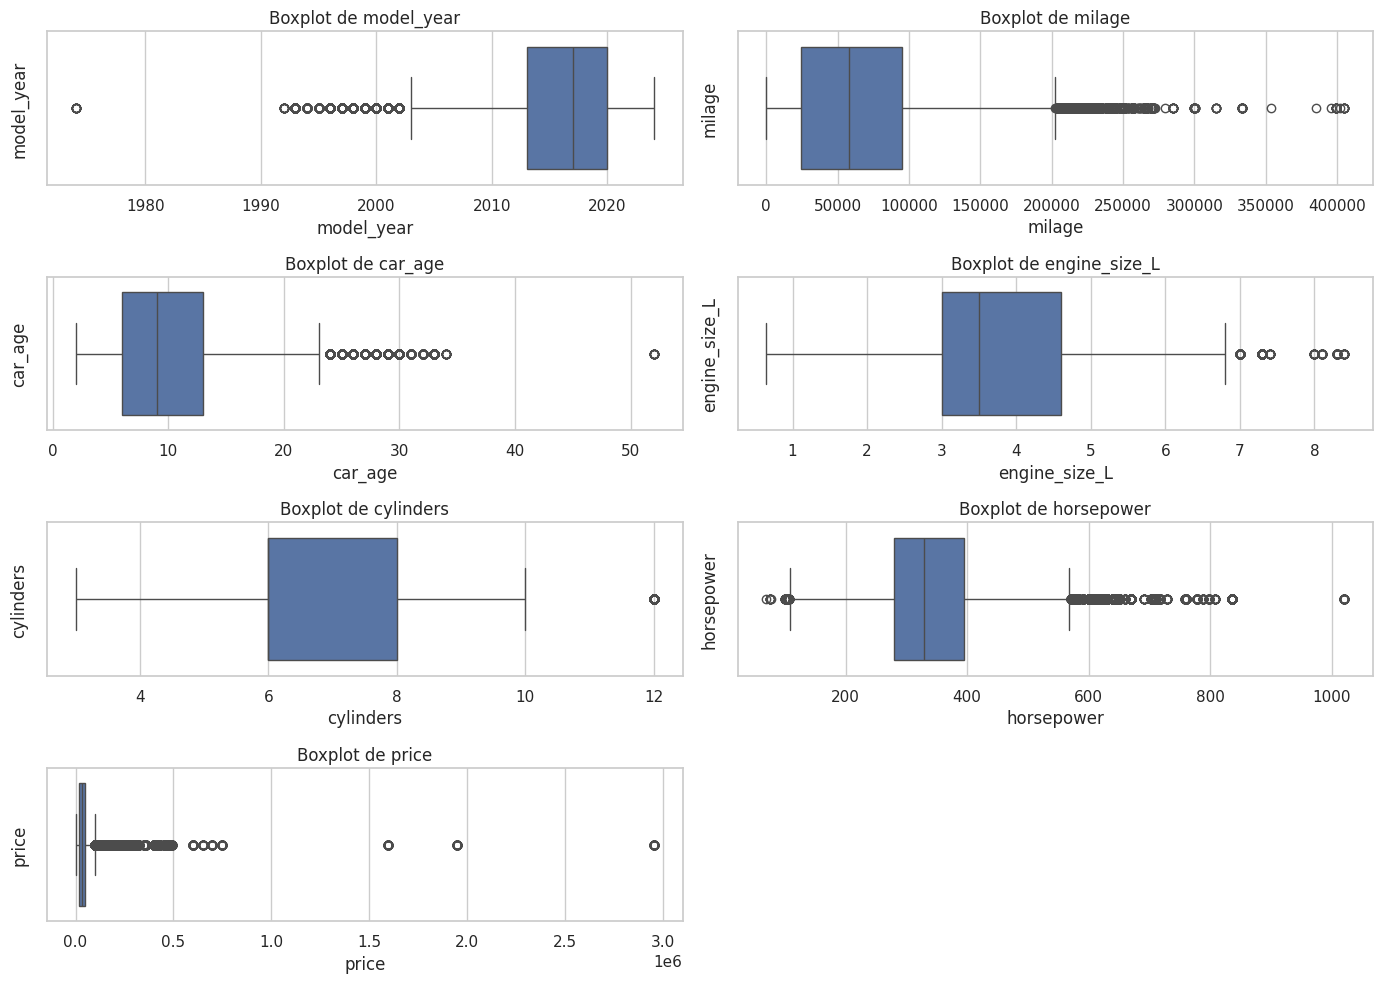

In [ ]:
plt.figure(figsize=(14,10))

# Ajustamos la cuadrícula a 4 filas y 2 columnas para acomodar 7 gráficos
# Esto provee 8 espacios, usando 7 de ellos.
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(4, 2, i) # Cambiamos de 3, 2 a 4, 2
    sns.boxplot(
        x=df_clean[col], # Aquí se define como se muestra el boxplot, en horizontal o vertical
        orient='h'       # Esto hace automáticamente los quartiles
    )
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#Análisis Univariado variables categóricas

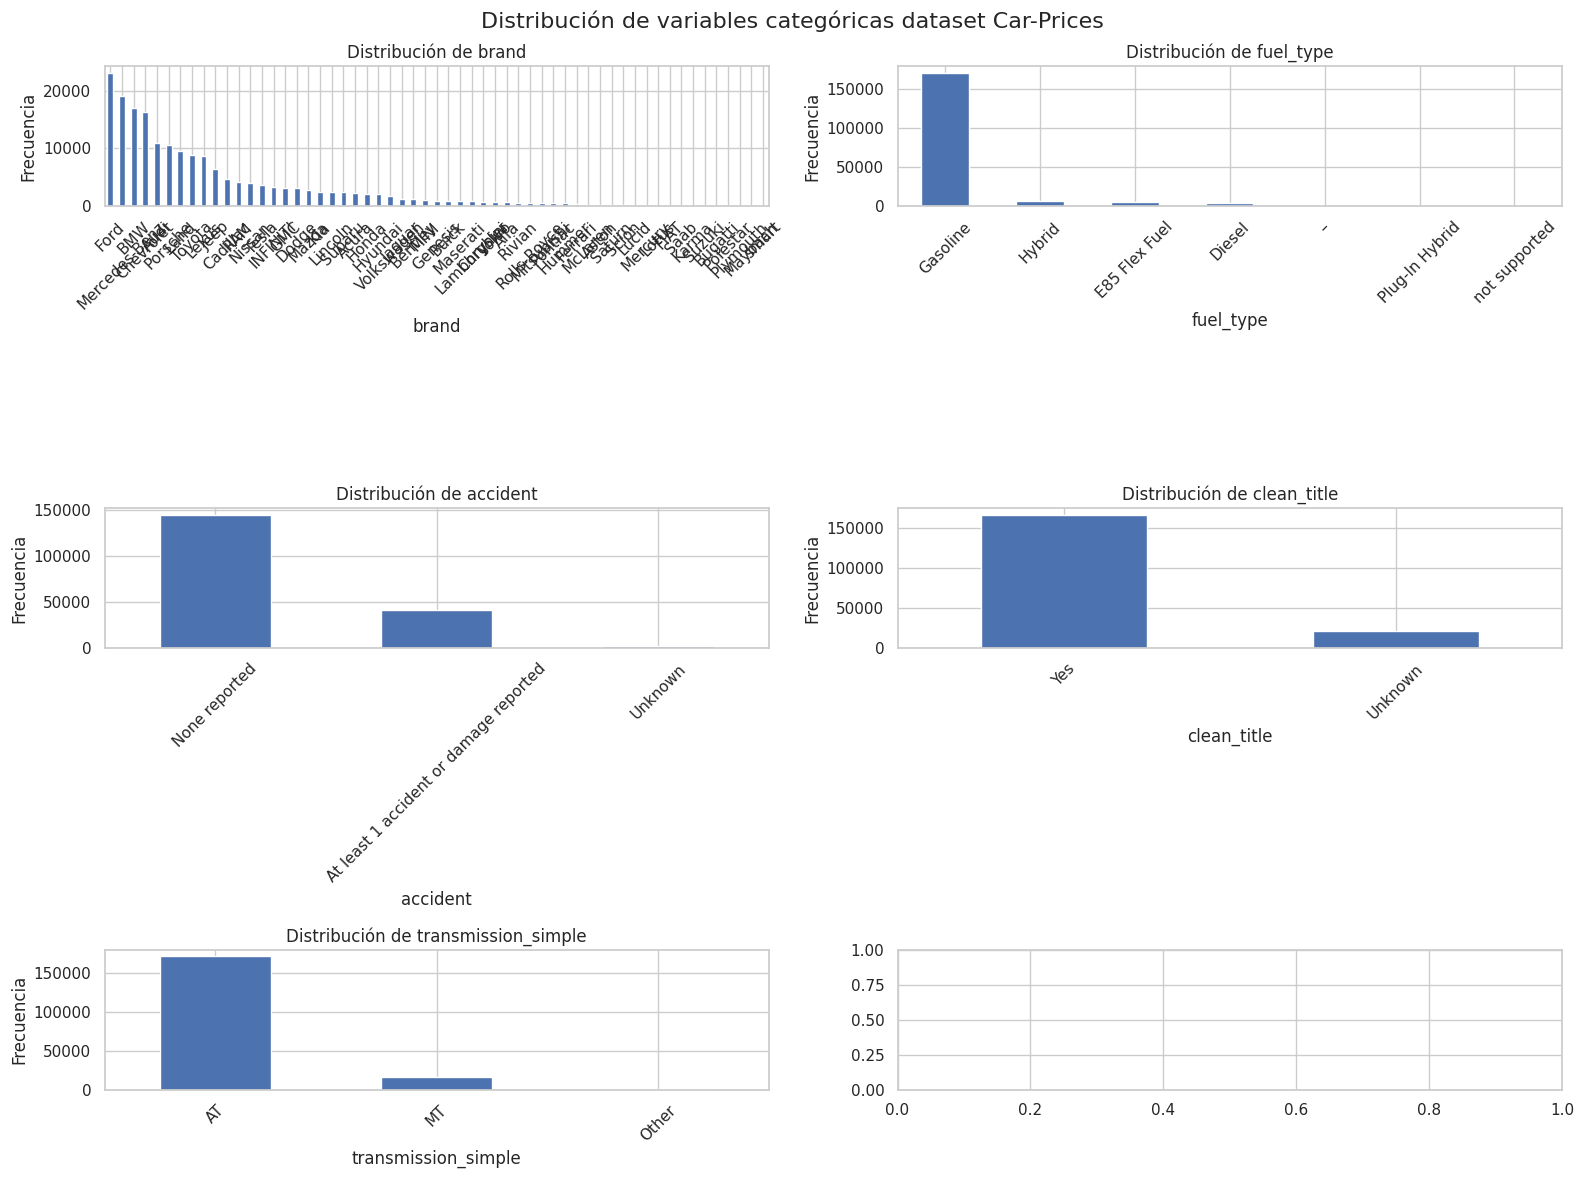

In [ ]:
#Guardamos las variables categóricasen una lista
variables_categoricas = ['brand','fuel_type','accident','clean_title','transmission_simple']
# Realización de histograma por cada columna dentro del array
# Crear figura con subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(variables_categoricas):
    df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Distribución de variables categóricas dataset Car-Prices", fontsize=16)
plt.tight_layout()
plt.show()

#Relación de precio con otras categorias

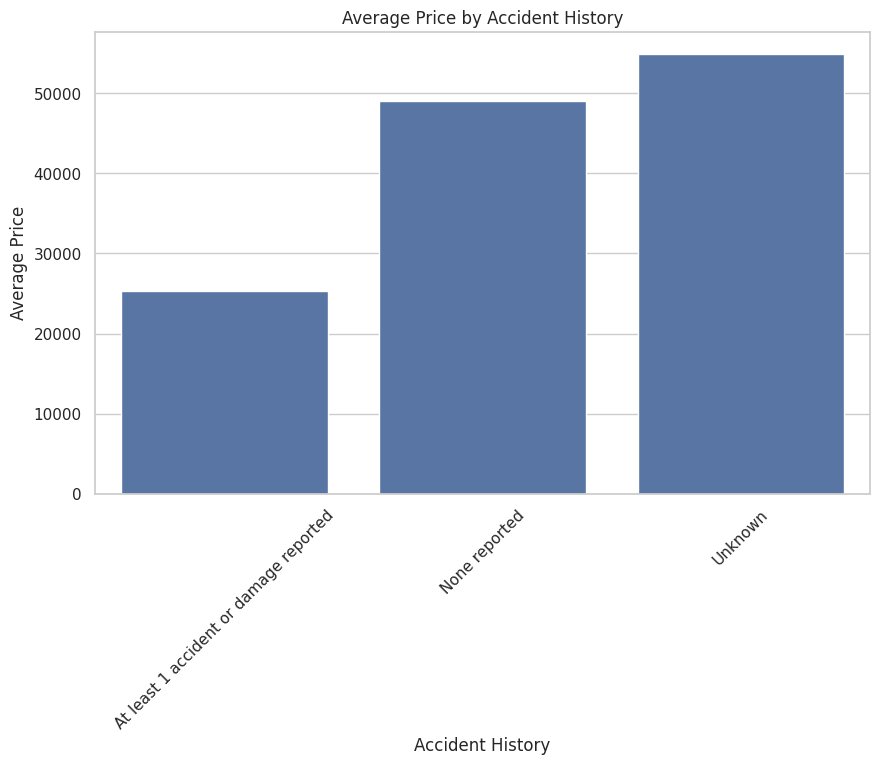

In [ ]:
# Precio medio por accident
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_clean
            , errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

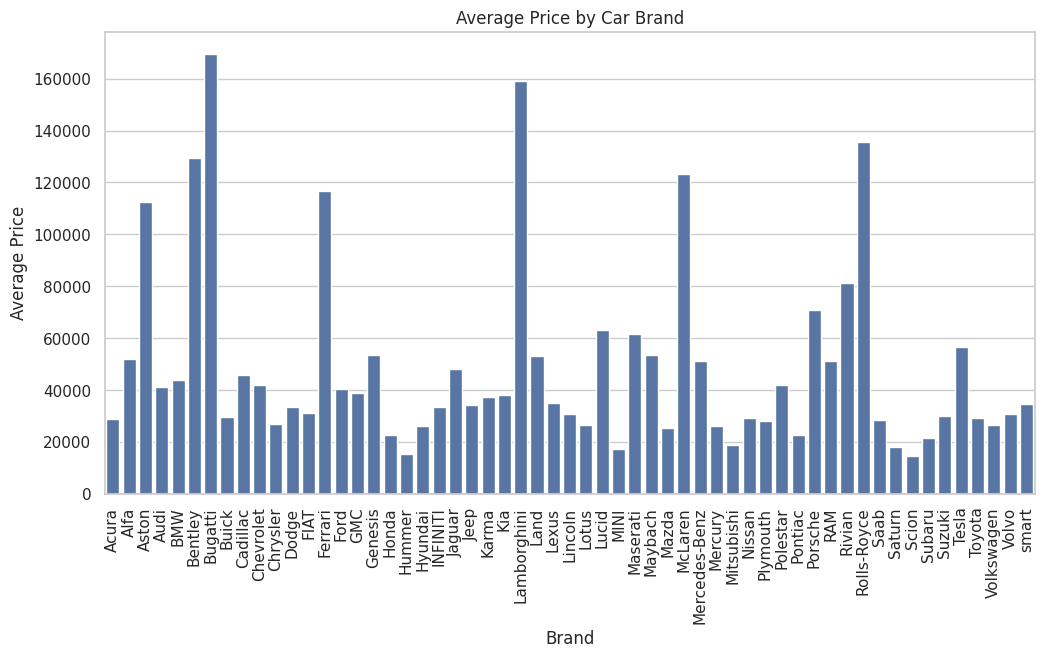

In [ ]:
#Precio medio por brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_clean, errorbar=None) #Automáticamente agrupa la media y lo agrupa por brand
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

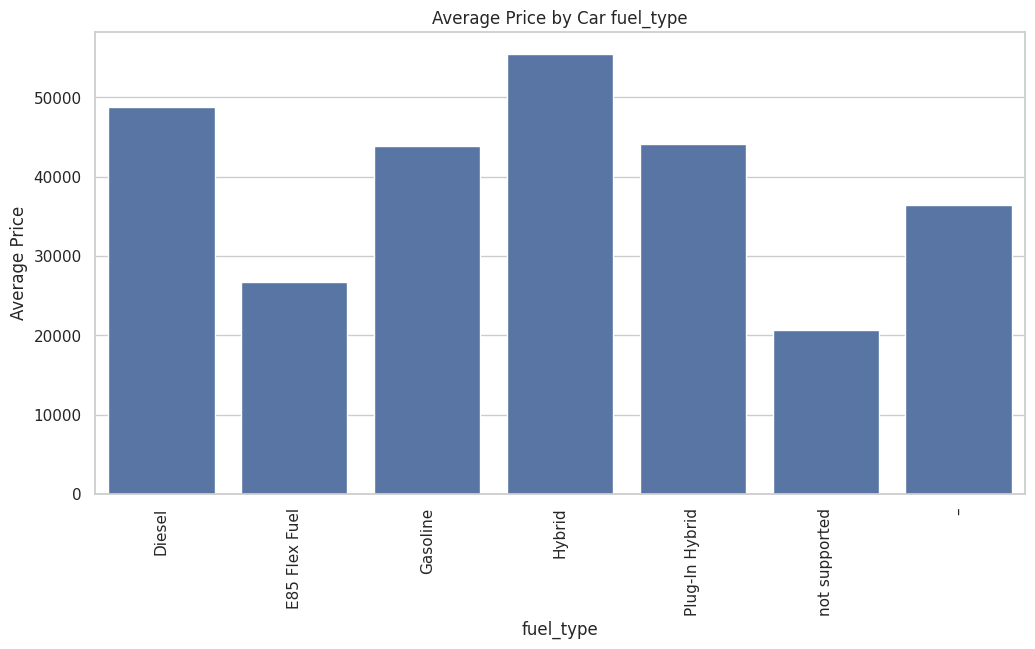

In [ ]:
#Precio medio por fuel_type
plt.figure(figsize=(12, 6))
sns.barplot(x='fuel_type', y='price', data=df_clean, errorbar=None) #Automáticamente agrupa la media y lo agrupa por brand
plt.title('Average Price by Car fuel_type')
plt.xlabel('fuel_type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

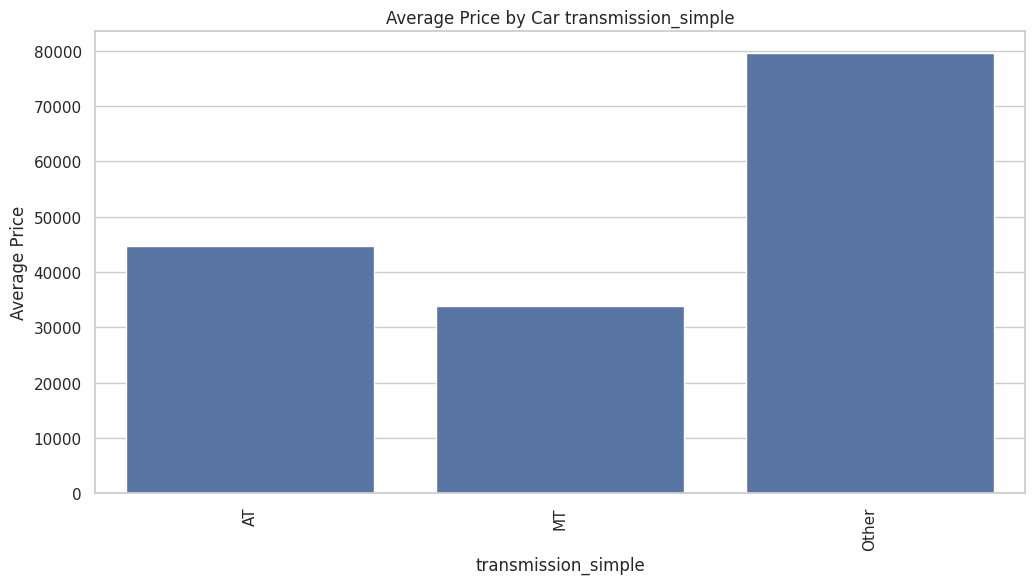

In [ ]:
#Precio medio por transmission_simple
plt.figure(figsize=(12, 6))
sns.barplot(x='transmission_simple', y='price', data=df_clean, errorbar=None) #Automáticamente agrupa la media y lo agrupa por brand
plt.title('Average Price by Car transmission_simple')
plt.xlabel('transmission_simple')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

#4.Correlación de Métricas numéricas

In [ ]:
# Muestra de la Matrix de correlación
correlation_matrix = df_clean[variables_numericas].corr()
print("Matriz de Correlación de Métricas de Incremento:")
print(correlation_matrix)


Matriz de Correlación de Métricas de Incremento:
               model_year    milage   car_age  engine_size_L  cylinders  \
model_year       1.000000 -0.669936 -1.000000      -0.010703  -0.030511   
milage          -0.669936  1.000000  0.669936      -0.020923  -0.041423   
car_age         -1.000000  0.669936  1.000000       0.010703   0.030511   
engine_size_L   -0.010703 -0.020923  0.010703       1.000000   0.821548   
cylinders       -0.030511 -0.041423  0.030511       0.821548   1.000000   
horsepower       0.351653 -0.388762 -0.351653       0.514583   0.639011   
price            0.231795 -0.283067 -0.231795       0.091372   0.087329   

               horsepower     price  
model_year       0.351653  0.231795  
milage          -0.388762 -0.283067  
car_age         -0.351653 -0.231795  
engine_size_L    0.514583  0.091372  
cylinders        0.639011  0.087329  
horsepower       1.000000  0.207837  
price            0.207837  1.000000  


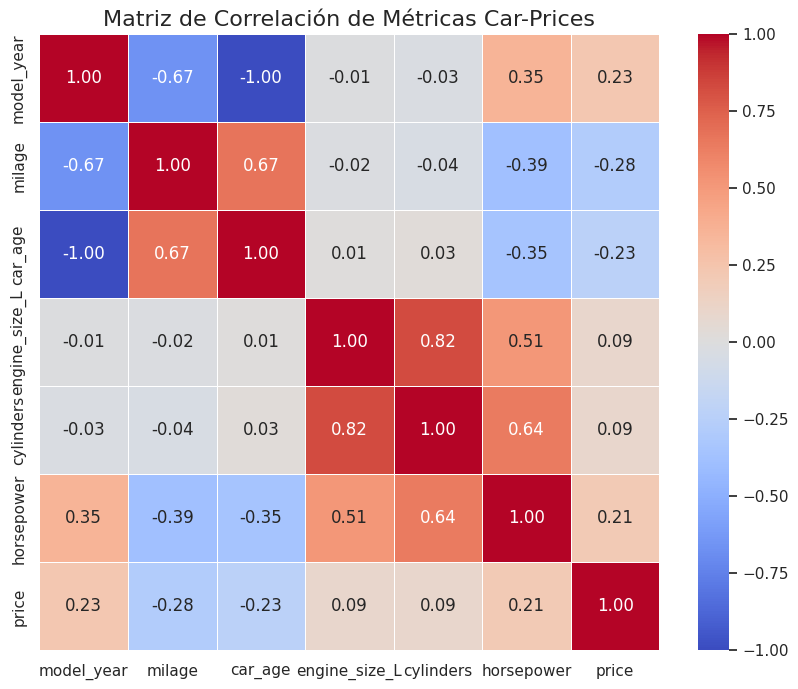

In [ ]:
#Mapa de calor para ver la correlación de todas las variables de incremento, eligiendo las mas cercanas a 1
# Para el análisis bivariado
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f", # Format annotation values to two decimal places
    linewidths=.5 # Add lines between cells for better readability
)
plt.title('Matriz de Correlación de Métricas Car-Prices', fontsize=16)
plt.show()


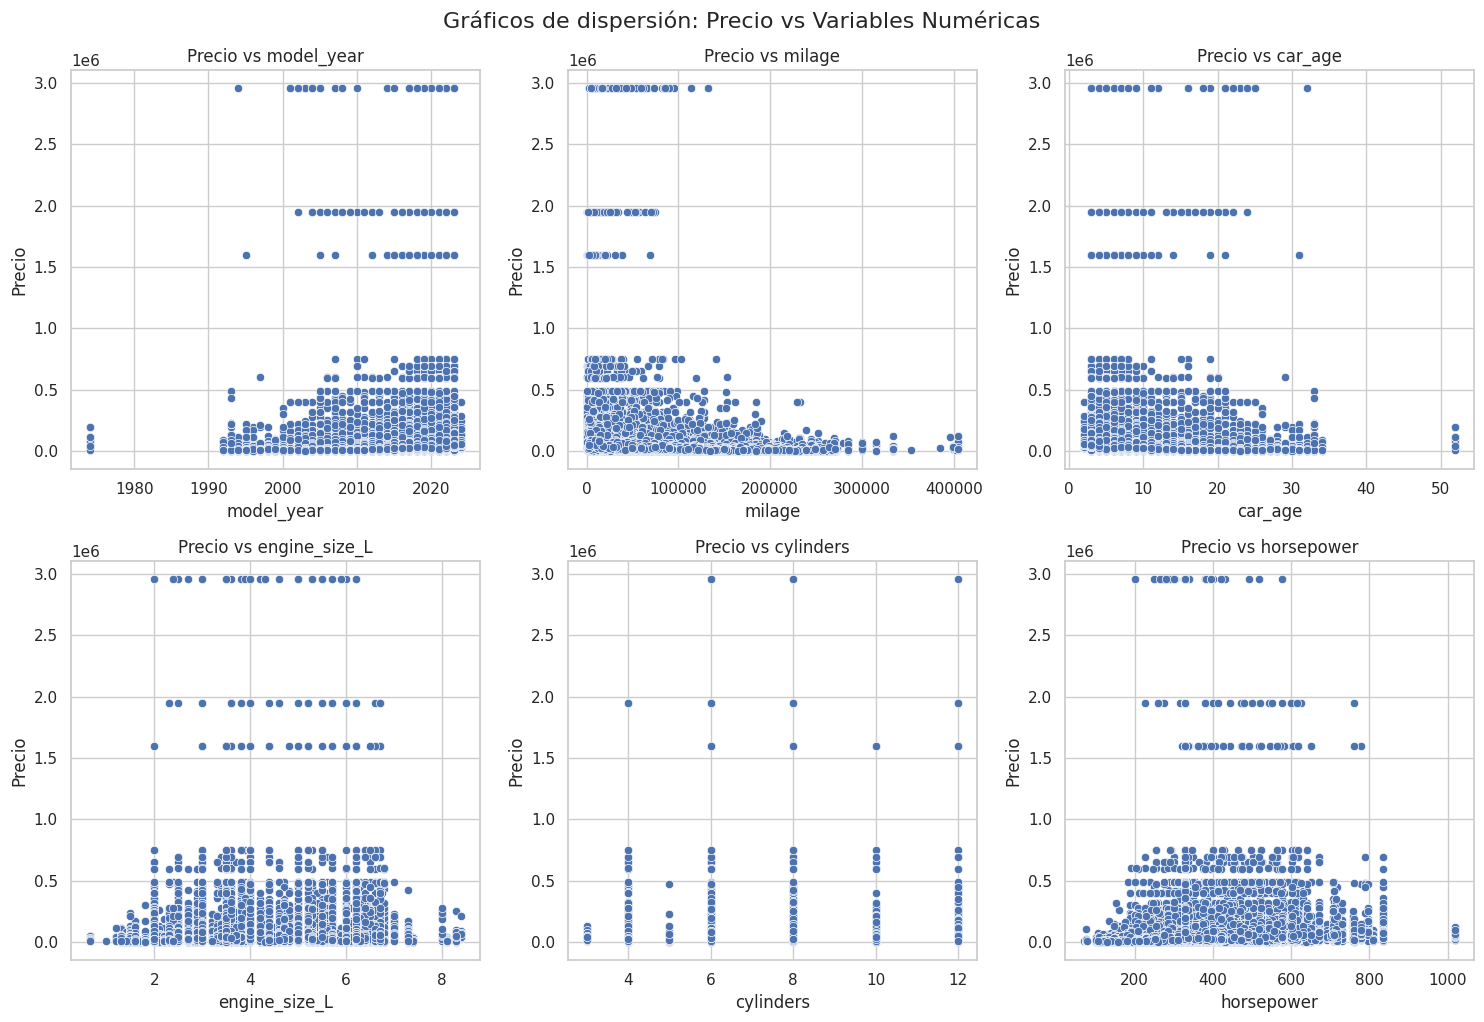

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir 'price' de la lista de variables numéricas para el eje X
x_variables = [col for col in variables_numericas if col != 'price']

plt.figure(figsize=(15, 10))

for i, col in enumerate(x_variables, 1):
    plt.subplot(2, 3, i)  # Ajusta la cuadrícula según el número de variables
    sns.scatterplot(x=df_clean[col], y=df_clean['price'])
    plt.title(f'Precio vs {col}')
    plt.xlabel(col)
    plt.ylabel('Precio')

plt.tight_layout()
plt.suptitle('Gráficos de dispersión: Precio vs Variables Numéricas', y=1.02, fontsize=16)
plt.show()

## Resumen del Procedimiento de Análisis Exploratorio de Datos (EDA)

El objetivo de este EDA fue comprender la estructura, las distribuciones y las relaciones de las variables en el dataset de precios de coches (`df_clean`) para identificar patrones, detectar anomalías y preparar el terreno para el modelado predictivo. El procedimiento se realizó en las siguientes etapas:

### 1. Carga y Visión General de los Datos
*   **Carga:** Se cargaron los datasets de entrenamiento (`cleaned_train.csv`) y prueba (`cleaned_test.csv`) en DataFrames de Pandas (`df_clean` y `df_clean_test`).
*   **Estructura y Tipos de Datos:** Se revisó la información general de los DataFrames (`.info()`) para identificar tipos de datos y valores no nulos. Se confirmaron y ajustaron los tipos de las columnas categóricas (`brand`, `fuel_type`, `transmission_simple`, `accident`, `clean_title`).
*   **Estadísticas Descriptivas:** Se obtuvieron estadísticas descriptivas (`.describe()`) para las variables numéricas, proporcionando una primera impresión de su centralidad, dispersión y rango.

### 2. Análisis Univariado

**Variables Numéricas:**
*   **Histogramas:** Se generaron histogramas para `model_year`, `milage`, `car_age`, `engine_size_L`, `cylinders`, `horsepower` y `price` para visualizar sus distribuciones. Se observó que `price`, `milage` y `horsepower` presentaban distribuciones fuertemente sesgadas a la derecha, indicando una concentración de valores bajos y colas largas hacia valores altos.
*   **Boxplots y Detección de Outliers (Método IQR):** Se utilizaron boxplots y el método del Rango Intercuartílico (IQR) para identificar y cuantificar la presencia de outliers en cada variable numérica. `price` y `horsepower` mostraron un número significativo de outliers, que podrían necesitar tratamiento para el modelado.

**Variables Categóricas:**
*   **Gráficos de Barras:** Se crearon gráficos de barras para `brand`, `fuel_type`, `accident` y `clean_title` para visualizar la frecuencia de cada categoría. Se notó una alta cardinalidad en `brand` y desequilibrio en las frecuencias de `fuel_type` y `accident`.

### 3. Análisis Bivariado

**Variables Numéricas:**
*   **Matriz de Correlación y Heatmap:** Se calculó la matriz de correlación entre las variables numéricas y se visualizó con un heatmap. Esto reveló:
    *   Correlación perfecta entre `model_year` y `car_age`.
    *   Correlación negativa moderada entre `milage` y `price` (-0.28).
    *   Correlaciones fuertes entre `engine_size_L`, `cylinders` y `horsepower`.

**Variables Categóricas y `price`:**
*   **Barplots (Price vs Categóricas):** Se exploró la relación del precio promedio con `accident` y `brand`. Se encontró que los vehículos sin accidentes reportados tienen precios promedio más altos. Además, la marca (`brand`) resultó ser un predictor muy fuerte del precio, con marcas de lujo mostrando precios significativamente más elevados.
*   **Heatmaps (Interacción de Categóricas con Price):** Se generaron heatmaps para visualizar el precio promedio (log-transformado) por combinaciones de `fuel_type`/`transmission_simple` y `accident`/`clean_title`. Estos gráficos mostraron cómo la interacción de estas variables afecta el precio, revelando patrones interesantes en los segmentos de mercado.

### 4. Análisis Multivariado
*   **Scatter Plot (Price vs Milage por Fuel Type):** Se creó un scatter plot que mostraba la relación entre el precio (log-transformado) y el millaje, diferenciado por el tipo de combustible. Se confirmó la relación inversa entre millaje y precio, y se observó cómo `fuel_type` modula esta relación, con diferentes agrupaciones para gasolina, híbridos y diésel.

### Hallazgos Clave e Implicaciones para el Modelado:
*   **Distribuciones Sesgadas y Outliers:** `price`, `milage`, `horsepower` y `model_year`/`car_age` tienen distribuciones sesgadas y muchos outliers. Esto hace necesaria una **transformación logarítmica para `price`** (ya aplicada) y **winsorización o transformaciones similares para otras variables numéricas**.
*   **Multicolinealidad:** Las fuertes correlaciones entre `model_year`/`car_age` y entre `engine_size_L`/`cylinders`/`horsepower` deben abordarse para evitar problemas en el modelo (ej. eliminar una de las variables correlacionadas).
*   **Cardinalidad de `brand`:** La alta cardinalidad de `brand` sugiere que el **Target Encoding** es una opción más adecuada que One-Hot Encoding para esta variable.
*   **Variables Predictivas Clave:** `brand`, `milage`, `accident` y `horsepower` mostraron ser variables importantes para predecir el precio.

Este EDA ha proporcionado una comprensión sólida de los datos, identificando los principales desafíos y oportunidades para la fase de preprocesamiento y construcción del modelo.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   brand                188533 non-null  category
 1   model_year           188533 non-null  int64   
 2   milage               188533 non-null  int64   
 3   fuel_type            188533 non-null  category
 4   accident             188533 non-null  category
 5   clean_title          188533 non-null  category
 6   price                188533 non-null  int64   
 7   car_age              188533 non-null  int64   
 8   horsepower           188533 non-null  float64 
 9   engine_size_L        188533 non-null  float64 
 10  cylinders            188533 non-null  float64 
 11  transmission_simple  188533 non-null  category
dtypes: category(5), float64(3), int64(4)
memory usage: 11.0 MB
